### Descriptive Statistics

When data contain thousands, if not millions, of observations, we need methods to summarize the data.

As a working example, consider the list of values below.

In [6]:
x = [1, 38, 4, 3, 7, -10, 7, 2, 5]

### Mean and Variance

The **mean** of the data is the average value in the data. Within the sample of observations included in the data, the mean is the *expected value* of the data.  It tells us, on average, what we'd expect to observe if we picked an observation at random.  For data $x$, the mean is sometimes written $E(x)$ (the $E$ stands for expected value).

In [7]:
import numpy as np
np.mean(x)

6.333333333333333

Naturally, not all observations are exactly equal to the mean value.  Thus, beyond summarizing what the average value of the data is, we want some sense of how much observations deviate from the expected value.  For a list of observations, $x$, we can calculate the deviation of each of these observations from the mean by taking $x-E(x)$.

In [8]:
x - np.mean(x)

array([ -5.33333333,  31.66666667,  -2.33333333,  -3.33333333,
         0.66666667, -16.33333333,   0.66666667,  -4.33333333,
        -1.33333333])

Now, the average deviation from the average is zero.  So simply taking the mean of these deviations isn't useful.

In [9]:
np.mean( x - np.mean(x) )

1.0855514018557087e-15

A trick is the square each deviation first, and then take the average of those squared deviations.

In [10]:
np.mean( (x - np.mean(x))**2 )

148.44444444444446

This is what's called the **variance** of the data.  Putting the above line of code into math, the variance is computed as $E\bigg( \big(x-E(x)\big)^2 \bigg)$.

In [11]:
np.var(x)

148.44444444444446

Now, the variance in the example above looks quite large.  Often, squaring things makes them bigger, so it makes sense that the average of squared numbers looks large.  To summare how much observations tend to deviate away from the mean, an alternative to calculating the variance is to calculate the **standard deviation**, which is just the square root of the variance.  This doesn't completely un-do the earlier squaring that is included in the variance computation, but it does tend to yield a smaller number.  The formal statement of a standard deviation is $\Bigg[E\bigg(\big( x - E(x)\big)^2 \bigg)\Bigg]^{1/2}$.

In [12]:
np.sqrt(np.var(x))

12.18377792166471

In [13]:
np.std(x)

12.18377792166471

### Median and Skewness

When we have a list of numbers, the `.sort()` command will sort that list *in place*.  Performing an operation *in place* is the alternative to *returning* a value.  For example, if we type the command `'LSU'.lower()`, Python will return a copy of the string `'LSU'` in lower case characters.  Thus if we have `s = 'LSU'` and do `s.lower()`, Python returns the value `'lsu`', but the string `s` still equals `'LSU'`.  In contrast, `x.sort()` will not return anything.  Rather, the list `x` is modified in place so that its elements get reordered from smallest to largest.  We've already seen at least one other example of an in place command: `.append()`.

In [14]:
x.sort()
print(x)

[-10, 1, 2, 3, 4, 5, 7, 7, 38]


Sorting, at least for small lists of numbers, makes it easy to pick out the middle number.  The middle of a set of a numbers is called the **median**.

In [15]:
np.median(x)

4.0

If the set has an even number of elements, there isn't a precise middle element.  The default is then to take the average of the two middle numbers.

In [16]:
np.median(x[:8])

3.5

The mean is a good bit higher than the median.  Why?

There is **skewness** in the distribution of numbers.  That means that the set of numbers has some outliers out to one side or the other.  Here, we have positive skewness, which means that there are some big outliers out to the right side.

Formally, a calculation for skewness is given in the `scipy` module.  We won't worry too much about it here.

In [17]:
import scipy.stats

In [18]:
scipy.stats.skew(x)

1.6656502035844625

### Outliers, Kernel Density, and Box Plots

Means and medians tell us a little bit about the data at around the middle of the distribution.  Likewise variance and skewness tell us something about the spread of the distribution (how wide it is and how much it leans to one side or the other).

These numbers, while extraordinarily useful for a variety of applications, are still sometimes difficult to digest.  Below, we'll see the wisdom of the old adage ''a picture is worth a thousand words.''

For this analysis, we'll need more data:

In [19]:
y = [i for i in range(100)] # start by setting y equal to a list of numbers 1,..,99
y = y + [200] # add the number 1000 to the list, this number is an *outlier*
y = y + [30, 30, 30, 30, 30] # add a few copies of the number 30 to the list, so that it's the most frequently ocurring number

When operating in Jupyter notebooks, we gain access to a special module that isn't useful outside of a notebook environment (e.g. if you ran Python from your terminal/command window, this module would not work).  The module's name is `seaborn`.

Like `numpy` (usually abbreviated as `np`) and `pandas` (usually abbreviated as `pd`) the `seaborn` module has the following cononical import statement.

In [22]:
import seaborn as sns

The first tool to explore is the **kernel density estimate**, which plots the distribution of numbers in our data.

<AxesSubplot:ylabel='Density'>

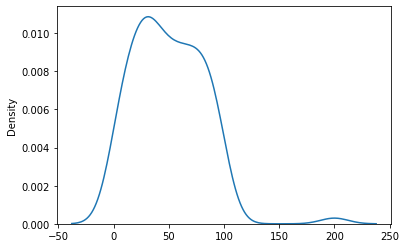

In [23]:
sns.kdeplot(y)

Note that the kernel density estimate is not good at the end points.  For mathematical reasons, a kernel density estimate is not good at  end points.  Other aspects of the plot are consistent with expectations.  The density is fairly level over 0 to 99, with a slight peak at around 30.  There is also a little bump out at 200 where we placed an outlier.

In [24]:
np.median(y)

47.5

In [25]:
np.mean(y)

50.0

We again have a case of positive skewness (200 is a big outlier), and thus the mean is bigger than the median.

Knowledge about how these descriptive statics characterize the data is important in financial analytics and modeling.  For instance, consider a business looking at building a new grocery store in a county.  The expected cash flows for that project are more closely related to the median of county income, rather than the mean of county income.  Why?  Hint: county income has positive skewness.

As an alternative the the kernel density estimate, consder the **boxplot** below.

/Users/jamesnordlund/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

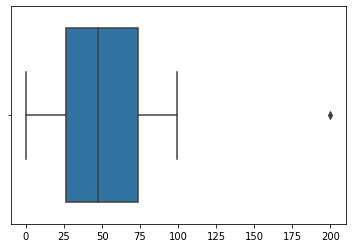

In [26]:
sns.boxplot(y)

The *box* (the shaded region between roughly 25 and 75) tells us where the middle 50% of the data is.  Thus, about 50% of the data falls between 25 and 75, with another 25% of the data on either side of this box.

The horizontal lines extending from either side of the box and terminating with a vertical line are called the *whiskers*.  These give a sense of where approximately the other 50% of the data falls (again, 25% on each side of the box), save for a few outliers.  Above, we see that the whiskers extend out to zero on the left and one hundered on the right.  Data that do not fall within these ranges are referred to as *outliers*, and are plotted as individual points (e.g. the number 200 on the far right).

Outlier identification is a good way to assess data quality.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/learning-fintech/data/master/stocks/all_stocks_5yr.csv.gz')

data.head()

,date,open,high,low,close,volume,Name,ret,Mkt,SMB,HML,RMW,CMA,RF
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A,NaN,0.58,0.03,-0.21,0.12,-0.45,0.0
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A,-0.010648,-0.08,-0.03,0.39,-0.18,0.28,0.0
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A,0.000448,0.16,0.26,0.71,-0.54,0.45,0.0
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A,0.002913,0.14,0.08,-0.01,-0.01,-0.04,0.0
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A,-0.003799,0.11,0.32,0.12,-0.30,-0.21,0.0


An example using real data.

In [4]:
data[['ret','close']].describe()

,ret,close
count,618535.000000,619040.000000
mean,0.000541,83.043763
std,0.016060,97.389748
min,-0.626183,1.590000
25%,-0.006793,40.245000
50%,0.000635,62.620000
75%,0.008105,94.410000
max,1.009513,2049.000000


Note that there is no information about skewness.

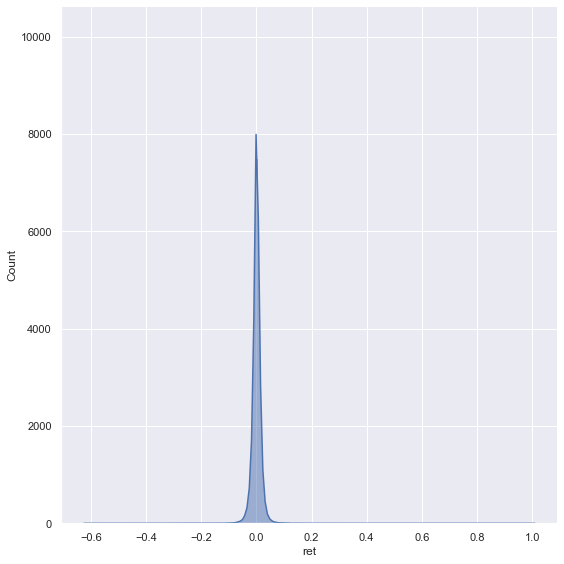

In [47]:
sns.displot(data['ret'], height=8)

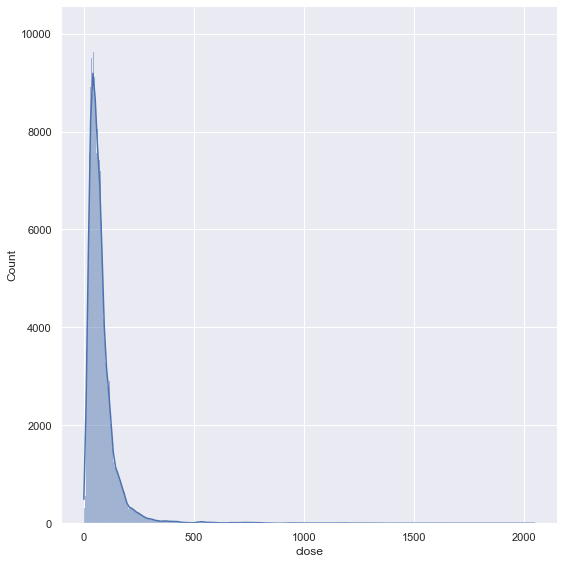

In [48]:
sns.displot(data['close'], height=8)